Machine Learning Project

Loading the libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importation of the dataset and first visualisation

In [28]:
data = pd.read_csv("Dataset_Projet.csv", sep=";")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Preprocessing the data

In [29]:
#Lets check for missing values
print("Missing values per column :")
print(data.isnull().sum(), "\n")

#Encoding categorical values in numerical values
qualitative_cols = data.select_dtypes(include=["object", "category"]).columns

encoder = OneHotEncoder()
encoded = encoder.fit_transform(data[qualitative_cols]).toarray()
encoded_df = pd.DataFrame(encoded,
                          columns=encoder.get_feature_names_out(qualitative_cols),
                          index=data.index)
data = data.drop(columns=qualitative_cols)
data = pd.concat([data, encoded_df], axis=1)

print(data.head())

Missing values per column :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400         1.0       0.0        0.0   
1   18  33.770         1   1725.55230         0.0       1.0        1.0   
2   28  33.000         3   4449.46200         0.0       1.0        1.0   
3   33  22.705         0  21984.47061         0.0       1.0        1.0   
4   32  28.880         0   3866.85520         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0          

Exploration des données

First view of the dataset :


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0



Statistics on the dataset :


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


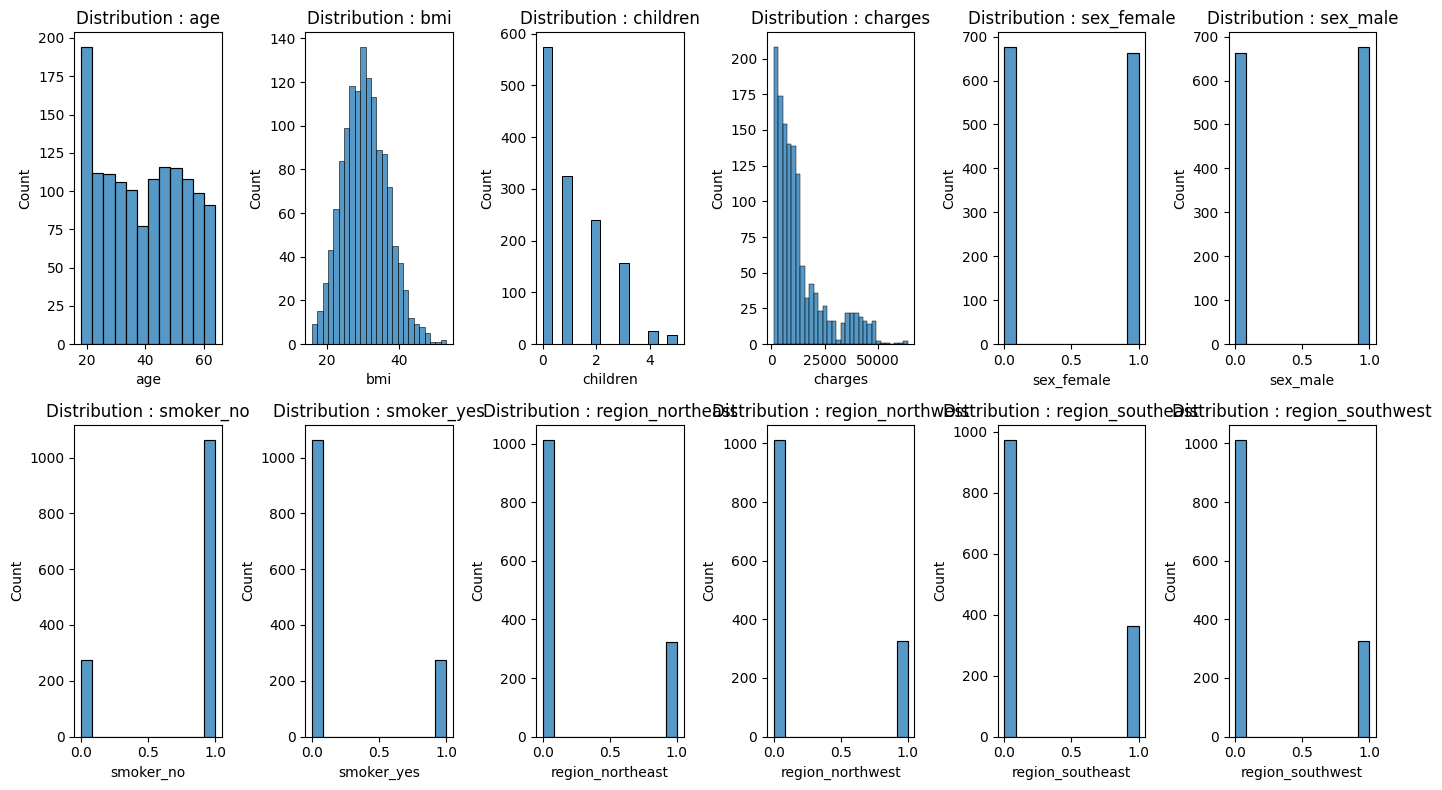

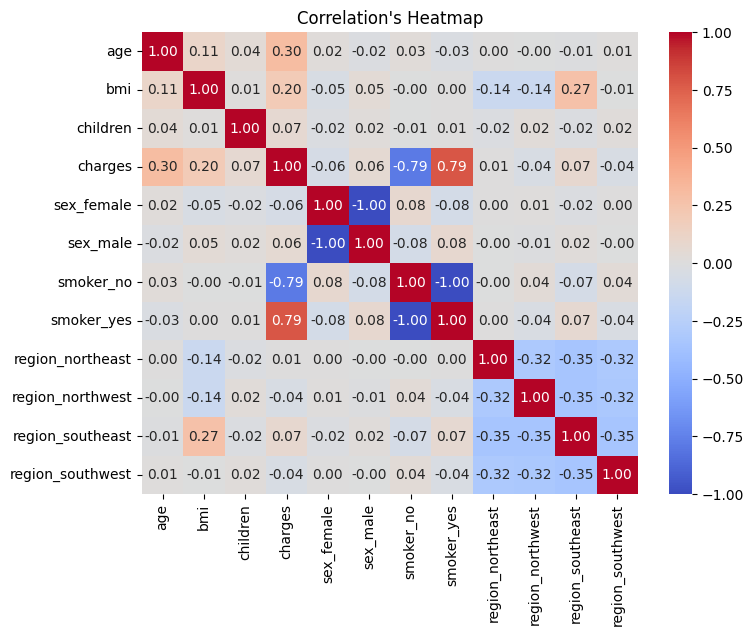

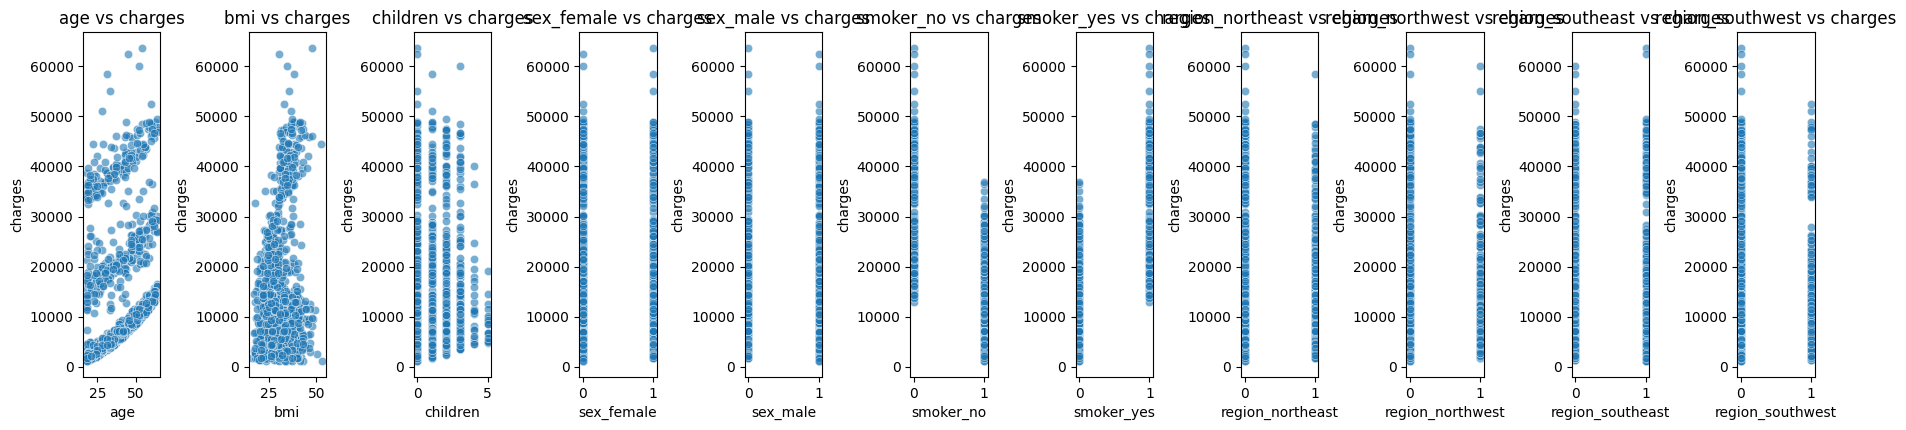

In [30]:
print("First view of the dataset :")
display(data.head())

print("\nStatistics on the dataset :")
display(data.describe())

# List of the different columns
num_cols = data.columns

# Lets check the spread of the differents variables
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    sns.histplot(data[col])
    plt.title(f"Distribution : {col}")
plt.tight_layout()
plt.show()

# Correlation's heatmap
plt.figure(figsize=(8, 6))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation's Heatmap")
plt.show()

# Scatterplots with the "charges" variable
target = "charges"

plt.figure(figsize=(20,8))
plot_index = 1
for col in num_cols:
    if col != target:
        plt.subplot(2, (len(num_cols)), plot_index)
        sns.scatterplot(x=data[col], y=data[target], alpha=0.6)
        plt.title(f"{col} vs {target}")
        plot_index += 1

plt.tight_layout()
plt.show()

Splitting the dataset

In [31]:
# Targeting the variable useful for the model
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Visualization of the training set
print("\nFirst view of the training set :")
print(X_train.head())


First view of the training set :
      age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
560    46  19.95         2         1.0       0.0        1.0         0.0   
1285   47  24.32         0         1.0       0.0        1.0         0.0   
1142   52  24.86         0         1.0       0.0        1.0         0.0   
969    39  34.32         5         1.0       0.0        1.0         0.0   
486    54  21.47         3         1.0       0.0        1.0         0.0   

      region_northeast  region_northwest  region_southeast  region_southwest  
560                0.0               1.0               0.0               0.0  
1285               1.0               0.0               0.0               0.0  
1142               0.0               0.0               1.0               0.0  
969                0.0               0.0               1.0               0.0  
486                0.0               1.0               0.0               0.0  


Scaling the dataset

In [32]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


Preparing the Linear Regression Model

In [33]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Prediction of the different prices

In [34]:
y_pred = model.predict(X_test_scaled)

Visualisation of the different metrics of the model


Regression model's evaluation
MAE  (Mean Absolute Error)      : 4181.194
RMSE (Root Mean Squared Error)  : 5796.285
R²   (Coefficient de détermination) : 0.784


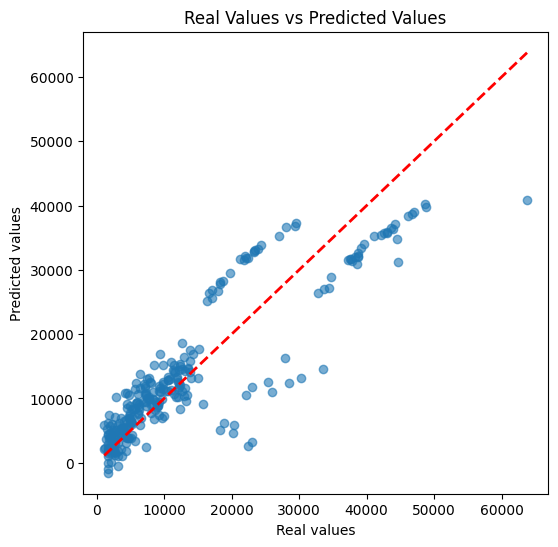

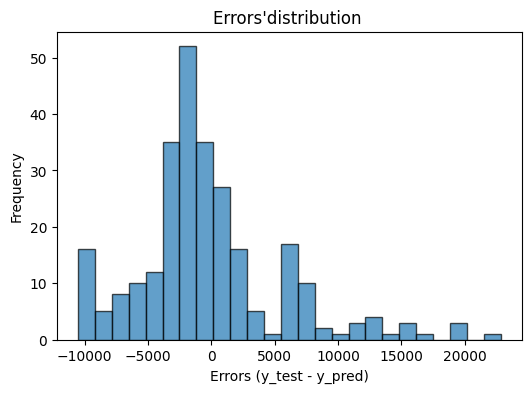

In [35]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nRegression model's evaluation")
print(f"MAE  (Mean Absolute Error)      : {mae:.3f}")
print(f"RMSE (Root Mean Squared Error)  : {rmse:.3f}")
print(f"R²   (Coefficient de détermination) : {r2:.3f}")

# Visualization of the predicted values vs the real values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Real Values vs Predicted Values")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Visualization of the errors
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=25, edgecolor="k", alpha=0.7)
plt.title("Errors'distribution ")
plt.xlabel("Errors (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()